In [1]:
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import os


Cahier pour l'extraction des données hydrographiques :
* via hydroshed : https://www.hydrosheds.org/products
* via GeoNames : https://www.geonames.org/ (il faut créer un compte et récupérer le login)

# GeoNames

In [ ]:
# === Configuration ===
GEONAMES_USERNAME = "XX"  # utiliser le nom de login voir https://www.geonames.org/

# Define bounding box: (South, North, West, East)
lat_min, lat_max = 45.0, 46.5
lon_min, lon_max = 6.0, 7.5
# GeoNames API endpoint for search
url = "http://api.geonames.org/searchJSON"

# Feature code "MT" = mountain
params = {
    "north": lat_max,
    "south": lat_min,
    "east": lon_max,
    "west": lon_min,
    "featureCode": "PPL",
    "maxRows": 500,
    "username": GEONAMES_USERNAME,
    "type": "json"
}

# === Make API request ===
response = requests.get(url, params=params)
data = response.json()

# === Extract results ===
if "geonames" in data:
    records = []
    for item in data["geonames"]:
        records.append({
            "name": item["name"],
            "latitude": item["lat"],
            "longitude": item["lng"],
            "elevation": item.get("elevation", None),
            "country": item.get("countryName", "")
        })

    df = pd.DataFrame(records)
    print(df.head())

else:
    print("Error:", data.get("status", {}).get("message", "No data returned"))


                  name  latitude longitude elevation      country
0               Cluses  46.06251   6.57497      None       France
1            Annemasse  46.19439   6.23775      None       France
2             Chamonix  45.92375   6.86933      None       France
3             Montreux  46.43301   6.91143      None  Switzerland
4  Saint-Genis-Pouilly  46.24356   6.02119      None       France


# Hydroshed

## Lacs

<Axes: >

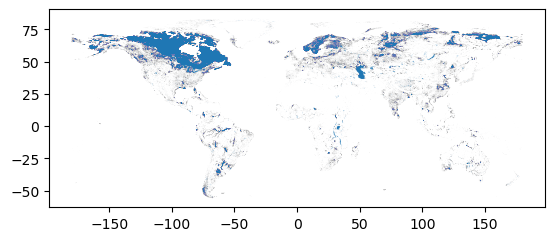

In [ ]:
import geopandas as gpd
#fichier = https://www.hydrosheds.org/products/hydrolakes
adresse_lac = "/home/ancey/Cartographie/hydrosheds/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10_shp"
lacs = gpd.read_file(adresse_lac)
lacs.plot()
# 4'16''

### Alpes

<Axes: >

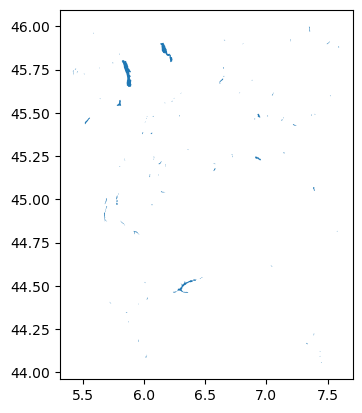

In [21]:
# bounding box : Alpes françaises
bbox = (5.4, 44.0, 7.6, 46.0)  # (xmin, ymin, xmax, ymax)
# Clip the rivers to the bounding box
bbox_polygon = box(*bbox)
lacs_clipped = lacs[lacs.geometry.intersects(bbox_polygon)]

# Plot the clipped rivers
lacs_clipped.plot()

In [22]:
lacs_clipped.to_file("lacs_alpes.gpkg", driver="GPKG")

### sud-est

<Axes: >

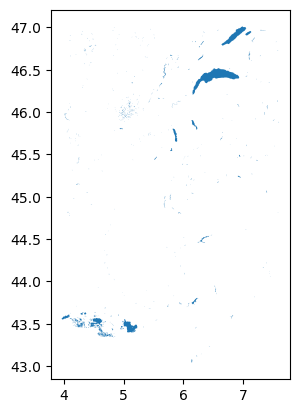

In [ ]:
# bounding box : sud-est de la France
bbox = (4, 43, 7.6, 47.0)  # (xmin, ymin, xmax, ymax)
# Clip the rivers to the bounding box
bbox_polygon = box(*bbox)
lacs_clipped = lacs[lacs.geometry.intersects(bbox_polygon)]

# recadrage
lacs_clipped.plot()

In [5]:
lacs_clipped.to_file("lacs_sud-est.gpkg", driver="GPKG")

## Rivières

In [ ]:
# 10'
# fichier : https://www.hydrosheds.org/products/hydrorivers
rivière_fichier = "/home/ancey/Cartographie/hydrosheds/HydroRIVERS_v10_eu_shp/HydroRIVERS_v10_eu_shp"
rivière = gpd.read_file(rivière_fichier)

### Alpes

<Axes: >

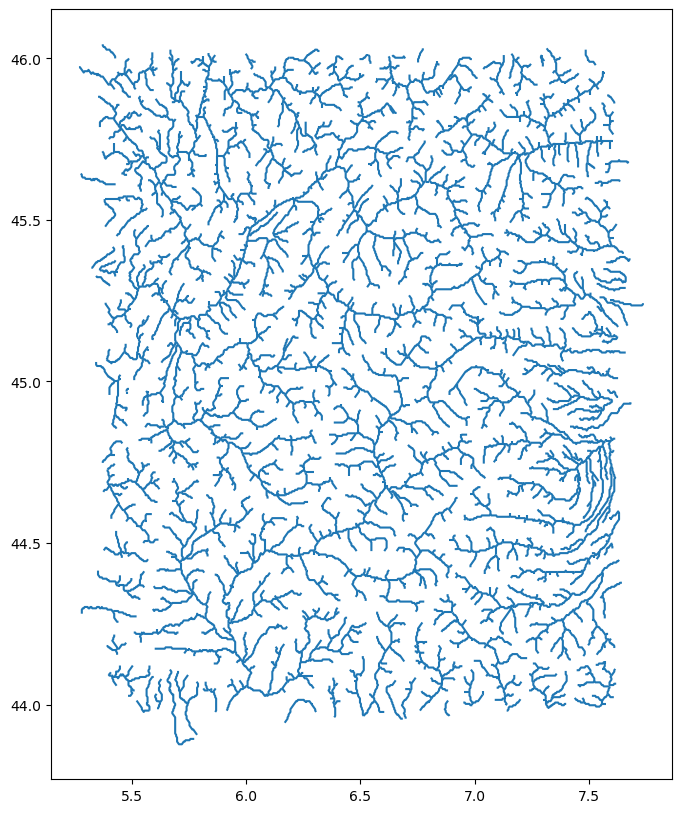

In [ ]:
# bounding box : Alpes françaises
bbox = (5.4, 44.0, 7.6, 46.0)  # (xmin, ymin, xmax, ymax)

# recadrage
rivière_cadre = rivière[rivière.geometry.intersects(box(*bbox))]
rivière_cadre.plot(figsize=(10, 10))

In [ ]:
rivière_cadre.to_file("rivières_alpes.gpkg", driver="GPKG")

### sud-est

<Axes: >

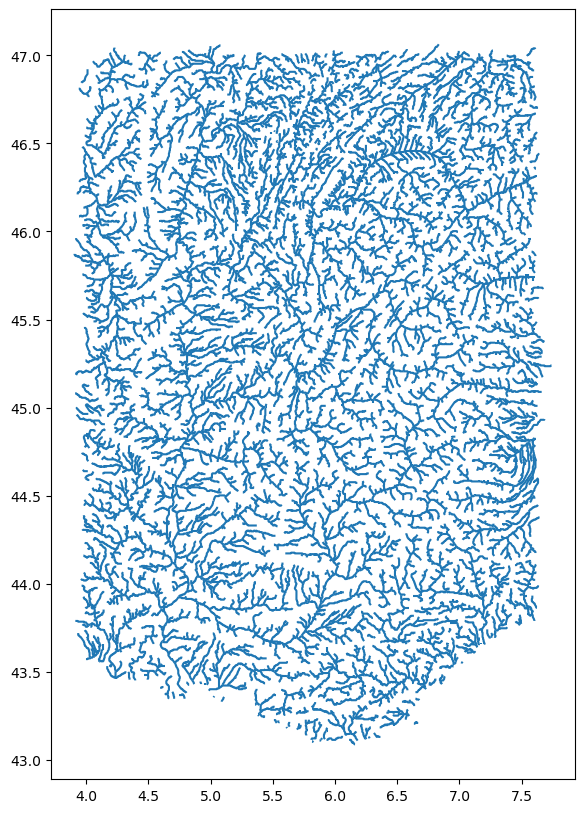

In [8]:
# bounding box : sud-est de la France
bbox = (4, 43, 7.6, 47.0)  # (xmin, ymin, xmax, ymax)

# recadrage
rivière_cadre = rivière[rivière.geometry.intersects(box(*bbox))]
rivière_cadre.plot(figsize=(10, 10))

In [9]:
rivière_cadre.to_file("rivières_sud-est.gpkg", driver="GPKG")